In [1]:
import string
import re
import contractions
import emoji
import pickle
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score,f1_score

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\sentiment\sentiment_dataset.csv")


In [4]:
class Preprocessing:
    def __init__(self):
        self.stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his",
              "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", 
              "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
              "having", "do", "does", "did", "doing", "a", "an", "the", "and", "if", "or", "because", "as", "until", "while", "of", "at",
              "by", "for", "with", "about", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from",
              "up", "down", "in", "on", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why",
              "how", "all", "any", "both", "each", "other", "some", "such", "own", "same", 
              "than", "too", "now"]
        
        self.punctuation_chars = string.punctuation
        self.regrex_pattern = f"[{re.escape(self.punctuation_chars)}]"
        self.url_pattern = r"https?://\S+|www\.\S+"

    def clean_text(self,text):
        de_emoji = emoji.demojize(text,delimiters=(" ", " "))
        url_remove = re.sub(self.url_pattern,"",de_emoji)  #remove URLS
        expanded = contractions.fix(url_remove).lower()
        punctuation_remove = re.sub(self.regrex_pattern,"",expanded)
    

        return punctuation_remove

In [5]:
process = Preprocessing() 

In [6]:
df.isna().sum()

Rating    0
Review    2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df["clean_text"] = df["Review"].apply(process.clean_text)

In [9]:
def labeling(rating):
    if rating<3:
        return "negative"
    elif rating>3:
        return "positive"
    else:
        return "neutral"
df["Sentiment"] = df["Rating"].apply(labeling)

In [10]:
df.head()

,Rating,Review,clean_text,Sentiment
0,4.0,"Good, soft saree pleats are standing crrt",good soft saree pleats are standing crrt,positive
1,4.0,Great,great,positive
2,5.0,Beautiful ❤️,beautiful redheart,positive
3,4.0,Nice 👍,nice thumbsup,positive
4,4.0,Nice saree,nice saree,positive


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['Sentiment']

In [ ]:
def prediction(model,X_test,y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(len(y_pred))
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision: ",precision_score(y_test, y_pred,average='weighted'))
    print("Recall_score: ",recall_score(y_test, y_pred,average='weighted'))
    print("F1_score: ",f1_score(y_test, y_pred,average='weighted'))

    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)

    
    new_review = ["This is the best product"]
    cleaned = [process.clean_text(r) for r in new_review]
    vectorized = vectorizer.transform(cleaned)
    prediction = model.predict(vectorized)
    print(prediction)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

3832
 Accuracy: 0.7022442588726514

 Precision:  0.6944848211872169

 Recall_score:  0.7022442588726514

 F1_score:  0.6962170383382831

 Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.72      0.70      1243
     neutral       0.59      0.48      0.53      1020
    positive       0.77      0.84      0.80      1569

    accuracy                           0.70      3832
   macro avg       0.68      0.68      0.68      3832
weighted avg       0.69      0.70      0.70      3832

['positive']


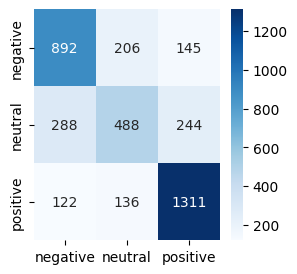

In [27]:
prediction(model,X_test,y_test)

## N-gram

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=5000)
X_gram = vectorizer.fit_transform(df['clean_text']).toarray()

y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_gram, y, test_size=0.2, random_state=42,stratify=y)


In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:

param_grid = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [500, 1000]
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           scoring='accuracy', # or 'f1_macro' for multi-class
                           cv=2,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.6909374108621069


In [32]:
best_logistic = grid_search.best_estimator_

3832
 Accuracy: 0.708768267223382

 Precision:  0.7022694996486555

 Recall_score:  0.708768267223382

 F1_score:  0.7038995798845931

 Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.73      0.71      1243
     neutral       0.59      0.50      0.54      1020
    positive       0.79      0.83      0.81      1569

    accuracy                           0.71      3832
   macro avg       0.69      0.69      0.68      3832
weighted avg       0.70      0.71      0.70      3832

['positive']


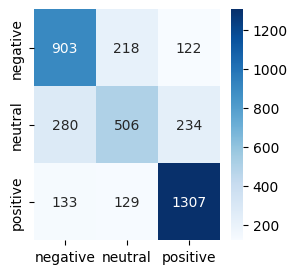

In [ ]:
prediction(best_logistic,X_test,y_test)
# Logistic Regression Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'}

In [35]:
from sklearn.svm import LinearSVC

In [38]:
svm = LinearSVC()

param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'class_weight': [None, 'balanced']     # Handle class imbalance
}

svm_grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=4,                 # 5-fold cross-validation
    scoring='accuracy',   # or 'f1_weighted' for imbalanced data
    n_jobs=-1,            # use all CPU cores
    verbose=1
)

svm_grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced']},
             scoring='accuracy', verbose=1)

Best Parameters: {'C': 0.1, 'class_weight': None}
3832
 Accuracy: 0.7082463465553236

 Precision:  0.6988037021956857

 Recall_score:  0.7082463465553236

 F1_score:  0.6989468103115234

 Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.73      0.71      1243
     neutral       0.61      0.45      0.52      1020
    positive       0.76      0.86      0.81      1569

    accuracy                           0.71      3832
   macro avg       0.69      0.68      0.68      3832
weighted avg       0.70      0.71      0.70      3832

['positive']


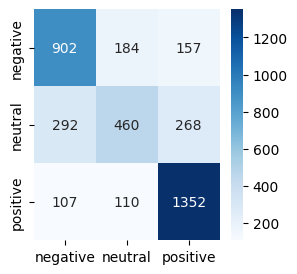

In [42]:
# Best parameters & model
print("Best Parameters:", svm_grid_search.best_params_)
best_svm = svm_grid_search.best_estimator_
prediction(best_svm,X_test,y_test)

In [43]:
from sklearn.svm import SVC

In [44]:
svm_rbf = SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced')  
svm_rbf.fit(X_train, y_train)

SVC(C=10, class_weight='balanced')

3832
 Accuracy: 0.7006784968684759

 Precision:  0.6972476687325129

 Recall_score:  0.7006784968684759

 F1_score:  0.6987221098643005

 Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.69      0.69      1243
     neutral       0.56      0.53      0.55      1020
    positive       0.79      0.82      0.80      1569

    accuracy                           0.70      3832
   macro avg       0.68      0.68      0.68      3832
weighted avg       0.70      0.70      0.70      3832



ValueError: cannot use sparse input in 'SVC' trained on dense data

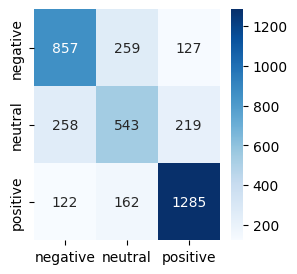

In [45]:
prediction(svm_rbf,X_test,y_test)

In [ ]:
The performance of our model was tested with the sklearn.metrics module. The main classification metrics used for this testing are F1-score, Precision, Accuracy, and Recall. In addition to these, the overall sklearn.metrics.classification_report was used to give a combined textual report of the above metrics for every class, along with overall averages, which gives an overview of the model's predictive power for all